In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,KFold
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
na=pd.read_csv("gas_turbines.csv")
na

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
na.shape

(15039, 11)

In [4]:
na.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [5]:
na=na.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX','TEY']]

In [6]:
na

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [7]:
x=na.iloc[:,0:-1]
y=na.iloc[:,-1]

In [8]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [9]:
y


0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [10]:
na.shape

(15039, 11)

In [11]:
na.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# CREATING MODEL

In [13]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=10,activation='ReLU'))
model.add(tf.keras.layers.Dense(10,activation='ReLU'))
model.add(tf.keras.layers.Dense(1,activation='ReLU'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [16]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=1000)

Epoch 1/50
13/13 [==============================] - 2s 34ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 2/50
13/13 [==============================] - 0s 10ms/step - loss: 18278.8848 - mse: 18278.8848 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 3/50
13/13 [==============================] - 0s 9ms/step - loss: 18278.8848 - mse: 18278.8848 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 4/50
13/13 [==============================] - 0s 12ms/step - loss: 18278.8848 - mse: 18278.8848 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 5/50
13/13 [==============================] - 0s 9ms/step - loss: 18278.8848 - mse: 18278.8848 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 6/50
13/13 [==============================] - 0s 10ms/step - loss: 18278.8867 - m

Epoch 46/50
13/13 [==============================] - 0s 9ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 47/50
13/13 [==============================] - 0s 12ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 48/50
13/13 [==============================] - 0s 9ms/step - loss: 18278.8828 - mse: 18278.8828 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 49/50
13/13 [==============================] - 0s 9ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587
Epoch 50/50
13/13 [==============================] - 0s 9ms/step - loss: 18278.8867 - mse: 18278.8867 - mae: 134.2709 - val_loss: 18169.9980 - val_mse: 18169.9980 - val_mae: 133.8587


In [17]:
model.save_weights("mywt.kmw")

In [18]:
scores=model.evaluate(x_train,y_train)
print("%s: %.2f%%" %(model.metrics_names[1],scores[1]*100))

376/376 [==============================] - 1s 3ms/step - loss: 18278.8887 - mse: 18278.8887 - mae: 134.2709
mse: 1827888.87%


In [19]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

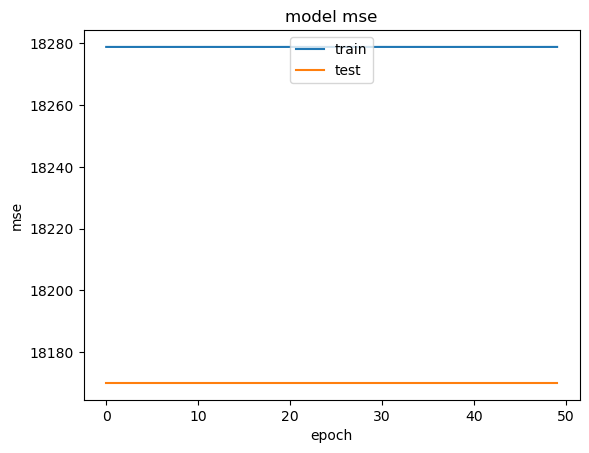

In [20]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper center')
plt.show()

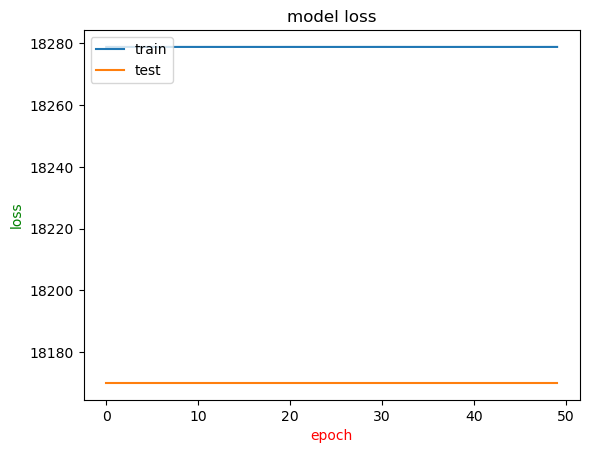

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss',color='green')
plt.xlabel('epoch',color='red')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
train_rmse=mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse=mean_squared_error(y_test,y_test_pred,squared=False)
print('Training set rmse: %.3f, Testing set rmse: %.3f' %(train_rmse,test_rmse))

94/94 [==============================] - 0s 3ms/step
Training set rmse: 135.199, Testing set rmse: 134.796


# RANDOMZIED SEARCH CV

In [23]:
def keras_reg_model(learning_rate,activation_function,init,neuron1,neuron2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neuron1,input_dim = 10,kernel_initializer=init,activation=activation_function))
    model.add(tf.keras.layers.Dense(neuron2,input_dim = neuron1,kernel_initializer=init,activation=activation_function))
    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse',optimizer = adam,metrics= ['mse','mae'])
    return model

In [24]:
keras_reg = KerasRegressor(build_fn=keras_reg_model,verbose = 0)

In [25]:
batch_size = [10,50,100,500,1000,2000]
epochs = [25,50,80,100,160]
learning_rate = [0.001,0.01,0.1]

activation_function = ['elu','relu','linear']
init = ['uniform','normal','zero']
neuron1 = [5,10,20,30]
neuron2 = [5,10,20,30]

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                  activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

random_search  = RandomizedSearchCV(estimator= keras_reg,param_distributions= param_grids,cv=5,n_jobs=-1,verbose=10
                                   ,random_state=35)
random_result = random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [26]:
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)

Best score: -2.250391435623169
Best parameters: {'neuron2': 30, 'neuron1': 10, 'learning_rate': 0.01, 'init': 'normal', 'epochs': 100, 'batch_size': 10, 'activation_function': 'linear'}


In [27]:
d1 = random_result.best_params_

keras_tuned = keras_reg_model(learning_rate=d1['learning_rate'],activation_function=d1['activation_function'],init=d1['init'],
                                                                                          neuron1=d1['neuron1'],neuron2=d1['neuron2'])
history2=keras_tuned.fit(x_train,y_train,validation_data=(x_test,y_test),
                        epochs =d1['epochs'],batch_size=d1['batch_size'])

Epoch 1/100
1204/1204 [==============================] - 6s 4ms/step - loss: 124.1120 - mse: 124.1120 - mae: 6.0115 - val_loss: 2.6781 - val_mse: 2.6781 - val_mae: 1.2757
Epoch 2/100
1204/1204 [==============================] - 5s 4ms/step - loss: 8.3348 - mse: 8.3348 - mae: 2.2914 - val_loss: 3.7454 - val_mse: 3.7454 - val_mae: 1.5352
Epoch 3/100
1204/1204 [==============================] - 5s 4ms/step - loss: 8.2303 - mse: 8.2303 - mae: 2.2883 - val_loss: 3.5362 - val_mse: 3.5362 - val_mae: 1.5291
Epoch 4/100
1204/1204 [==============================] - 5s 4ms/step - loss: 6.8017 - mse: 6.8017 - mae: 2.0624 - val_loss: 1.4887 - val_mse: 1.4887 - val_mae: 0.9459
Epoch 5/100
1204/1204 [==============================] - 6s 5ms/step - loss: 7.4641 - mse: 7.4641 - mae: 2.1749 - val_loss: 2.3350 - val_mse: 2.3350 - val_mae: 1.2637
Epoch 6/100
1204/1204 [==============================] - 5s 4ms/step - loss: 5.8988 - mse: 5.8988 - mae: 1.9204 - val_loss: 6.7135 - val_mse: 6.7135 - val_mae: 2

1204/1204 [==============================] - 4s 3ms/step - loss: 10.0742 - mse: 10.0742 - mae: 1.5796 - val_loss: 1.2168 - val_mse: 1.2168 - val_mae: 0.8463
Epoch 50/100
1204/1204 [==============================] - 4s 3ms/step - loss: 2.2707 - mse: 2.2707 - mae: 1.1844 - val_loss: 1.1893 - val_mse: 1.1893 - val_mae: 0.8329
Epoch 51/100
1204/1204 [==============================] - 4s 3ms/step - loss: 2.5957 - mse: 2.5957 - mae: 1.2697 - val_loss: 1.4037 - val_mse: 1.4037 - val_mae: 0.9391
Epoch 52/100
1204/1204 [==============================] - 4s 4ms/step - loss: 2.9056 - mse: 2.9056 - mae: 1.3386 - val_loss: 1.2141 - val_mse: 1.2141 - val_mae: 0.8298
Epoch 53/100
1204/1204 [==============================] - 5s 4ms/step - loss: 2.8450 - mse: 2.8450 - mae: 1.3311 - val_loss: 1.2899 - val_mse: 1.2899 - val_mae: 0.8671
Epoch 54/100
1204/1204 [==============================] - 5s 4ms/step - loss: 2.6457 - mse: 2.6457 - mae: 1.2748 - val_loss: 5.4605 - val_mse: 5.4605 - val_mae: 2.1085
Epo

Epoch 98/100
1204/1204 [==============================] - 5s 4ms/step - loss: 1.9694 - mse: 1.9694 - mae: 1.1036 - val_loss: 1.2621 - val_mse: 1.2621 - val_mae: 0.8693
Epoch 99/100
1204/1204 [==============================] - 5s 4ms/step - loss: 2.1357 - mse: 2.1357 - mae: 1.1511 - val_loss: 13.2690 - val_mse: 13.2690 - val_mae: 3.4848
Epoch 100/100
1204/1204 [==============================] - 5s 4ms/step - loss: 2.8200 - mse: 2.8200 - mae: 1.3181 - val_loss: 6.4725 - val_mse: 6.4725 - val_mae: 2.3209


In [28]:
y_train_pred_tuned=keras_tuned.predict(x_train)
y_test_pred_tuned = keras_tuned.predict(x_test)

train_rmse_tuned = mean_squared_error(y_train,y_train_pred_tuned,squared=False)
test_rmse_tuned = mean_squared_error(y_test,y_test_pred_tuned,squared=False)

print('Training set rmse : %.3f,Testing set rmse: %.3f' %(train_rmse_tuned,test_rmse_tuned))

94/94 [==============================] - 0s 3ms/step
Training set rmse : 2.516,Testing set rmse: 2.544


In [29]:
result=pd.DataFrame({'models':['base model','tuned model'],'train rmse':[train_rmse,train_rmse_tuned]
                    ,'test rmse':[test_rmse,test_rmse_tuned]})
result

,models,train rmse,test rmse
0,base model,135.199430,134.796142
1,tuned model,2.516013,2.544118
